Chefboost

In [1]:
import numpy as np
import pandas as pd

!pip install chefboost
from chefboost import Chefboost as chef

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# play tennis
url = 'https://drive.google.com/file/d/1es9XVl_Lhci0yTWn9h4OIANU9s_TrzkE/view?usp=sharing' #link google drive dataset
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:
df = pd.read_csv("/content/PlayTennis.csv")

In [4]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [7]:
for(columnName, columnData) in df.iteritems():
  print('Column Name : ', columnName)
  print('Column Unique : ', set(columnData.values), '\n')

Column Name :  Outlook
Column Unique :  {'Rain', 'Overcast', 'Sunny'} 

Column Name :  Temperature
Column Unique :  {'Mild', 'Hot', 'Cool'} 

Column Name :  Humidity
Column Unique :  {'Normal', 'High'} 

Column Name :  Wind
Column Unique :  {'Strong', 'Weak'} 

Column Name :  Play Tennis
Column Unique :  {'Yes', 'No'} 



Create Classifier Model

In [8]:
config = {'algorithm':'C4.5'}

c45_model = chef.fit(df, config, target_label = 'Play Tennis')

[INFO]:  1 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.5227735042572021  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  14  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[5, 0], [0, 9]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


Show Result

In [51]:
with open('/content/outputs/rules/rules.py', encoding='utf8') as f:
  for line in f:
    print(line.strip())

def findDecision(obj): #obj[0]: job, obj[1]: contact, obj[2]: month, obj[3]: Target
# {"feature": "job", "instances": 400, "metric_value": 1.0, "depth": 1}
if obj[0] == 'blue-collar':
# {"feature": "Target", "instances": 94, "metric_value": 0.9987, "depth": 2}
if obj[3] == 'no':
# {"feature": "contact", "instances": 93, "metric_value": 0.9979, "depth": 3}
if obj[1] == 'unknown':
# {"feature": "month", "instances": 93, "metric_value": 0.9979, "depth": 4}
if obj[2] == 'may':
return 'yes'
else: return 'yes'
else: return 'yes'
elif obj[3] == 'yes':
return 'no'
else: return 'no'
elif obj[0] == 'management':
# {"feature": "contact", "instances": 66, "metric_value": 0.9993, "depth": 2}
if obj[1] == 'unknown':
# {"feature": "month", "instances": 66, "metric_value": 0.9993, "depth": 3}
if obj[2] == 'may':
# {"feature": "Target", "instances": 66, "metric_value": 0.9993, "depth": 4}
if obj[3] == 'no':
return 'yes'
else: return 'yes'
else: return 'yes'
else: return 'yes'
elif obj[0] == 'technician

Prediction

In [10]:
print('Row : \n', df.loc[2])
print('\nPrediction : ', chef.predict(c45_model, df.loc[2]))

Row : 
 Outlook        Overcast
Temperature         Hot
Humidity           High
Wind               Weak
Play Tennis         Yes
Name: 2, dtype: object

Prediction :  Yes


In [12]:
chef.predict(c45_model, param = ['Overcast', 'Hot', 'High', 'Weak'])

'Yes'

In [14]:
chef.predict(c45_model, param = ['Sunny', 'Hot', 'Normal', 'Weak'])

'Yes'

In [15]:
chef.predict(c45_model, param = ['Sunny', 'Mild', 'Normal', 'Weak'])

'Yes'

In [17]:
chef.predict(c45_model, param = ['Rain', 'Cool', 'Normal', 'Strong'])

'No'

In [18]:
chef.predict(c45_model, param = ['Overcast', 'Mild', 'High', 'Strong'])

'Yes'

In [19]:
chef.predict(c45_model, param = ['Sunny', 'Hot', 'Normal', 'Strong'])

'Yes'

Studi kasus 2

In [20]:
df = pd.read_csv("/content/bank-full.csv")

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Feature Selection

In [23]:
categorical=[]
for col, value in df.iteritems():
  if value.dtype == 'object':
    categorical.append(col)

df = df[categorical]

In [24]:
df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   Target     45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [27]:
df_feature_select = df.copy()

for columnName in df_feature_select:
  df_feature_select[columnName] = le.fit_transform(df_feature_select[columnName])

df_feature_select.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [28]:
cor = df_feature_select.corr()

cor_target = abs(cor['housing'])

relevant_features = cor_target[cor_target>0.1]
relevant_features

job        0.125363
housing    1.000000
contact    0.188123
month      0.271481
Target     0.139173
Name: housing, dtype: float64

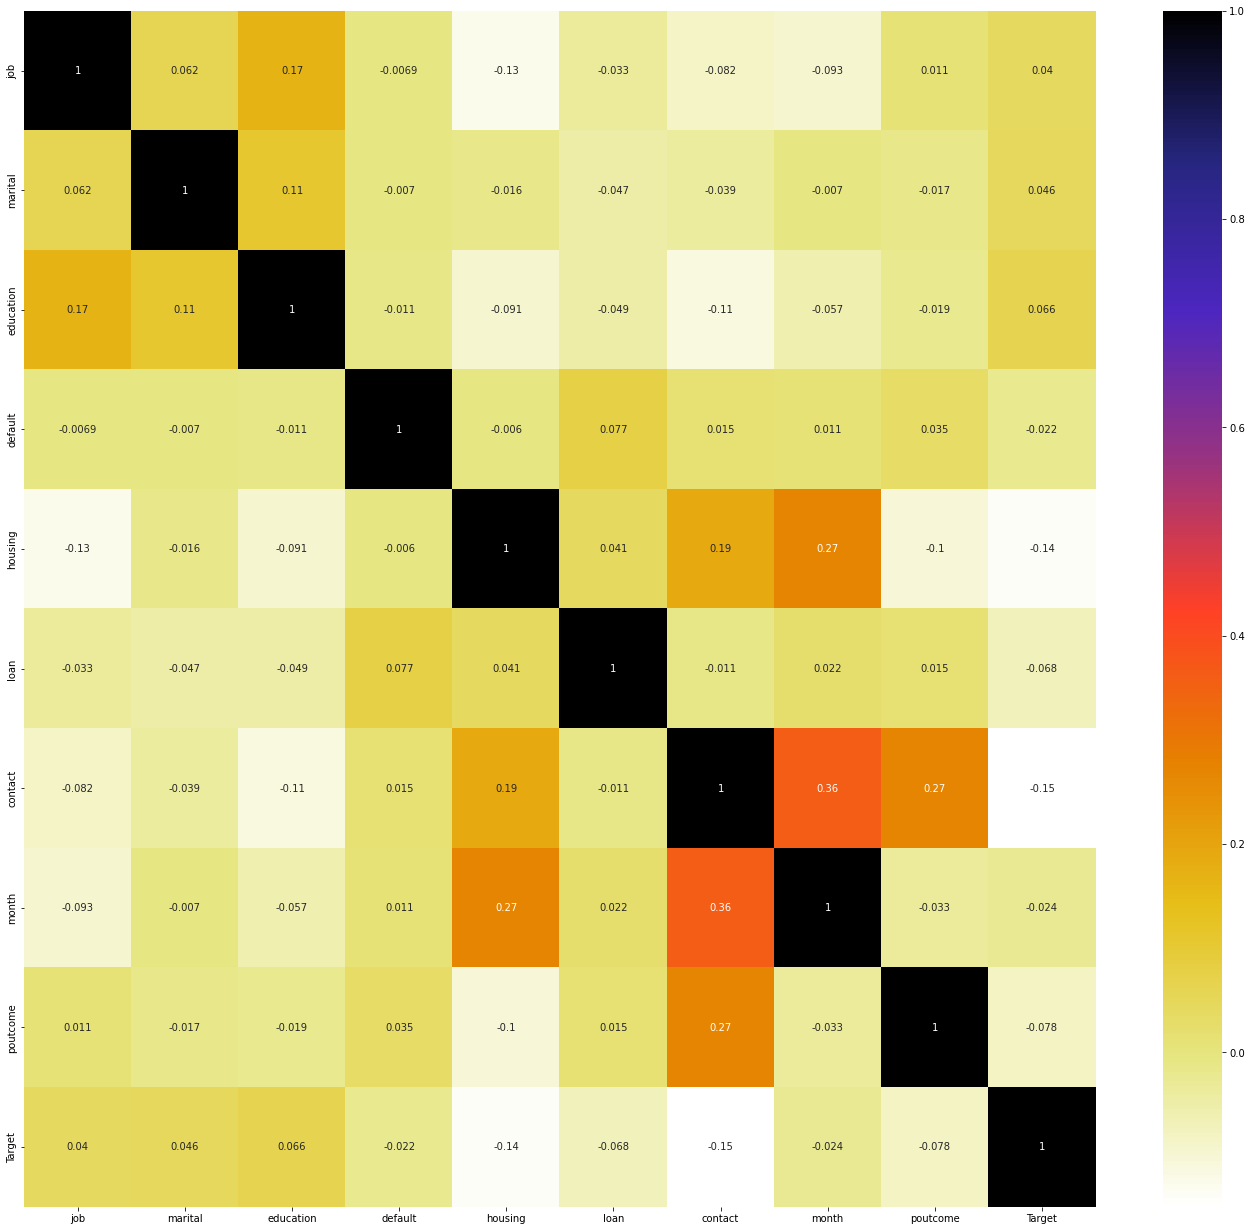

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24,22))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [30]:
relevant_features_col = ['job', 'contact', 'month', 'Target', 'housing']

In [34]:
selected_df = df[relevant_features_col]

In [35]:
selected_df

,job,contact,month,Target,housing
0,management,unknown,may,no,yes
1,technician,unknown,may,no,yes
2,entrepreneur,unknown,may,no,yes
3,blue-collar,unknown,may,no,yes
4,unknown,unknown,may,no,no
...,...,...,...,...,...
45206,technician,cellular,nov,yes,no
45207,retired,cellular,nov,yes,no
45208,retired,cellular,nov,yes,no
45209,blue-collar,telephone,nov,no,no


Splitting Data

In [77]:
df_train = selected_df.loc[selected_df['housing'] == 'yes'].head(200)
df_train_no = selected_df.loc[selected_df['housing'] == 'no'].head(200)
df_train = df_train.append(df_train_no).reset_index().drop('index',1)

<ipython-input-77-df261ca08012>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_train = df_train.append(df_train_no).reset_index().drop('index',1)


In [84]:
df_test = selected_df.loc[selected_df['housing'] == 'yes'].tail(80)
df_test_no = selected_df.loc[selected_df['housing'] == 'no'].tail(80)
df_test = df_test.append(df_test_no).reset_index().drop('index',1)

<ipython-input-84-94ade620e9e3>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test = df_test.append(df_test_no).reset_index().drop('index',1)


In [85]:
df_train

,job,contact,month,Target,housing
0,management,unknown,may,no,yes
1,technician,unknown,may,no,yes
2,entrepreneur,unknown,may,no,yes
3,blue-collar,unknown,may,no,yes
4,management,unknown,may,no,yes
...,...,...,...,...,...
395,self-employed,unknown,may,no,no
396,blue-collar,unknown,may,no,no
397,student,unknown,may,no,no
398,admin.,unknown,may,no,no


In [86]:
df_test

,job,contact,month,Target,housing
0,housemaid,cellular,sep,yes,yes
1,management,cellular,sep,no,yes
2,admin.,cellular,sep,yes,yes
3,technician,cellular,sep,no,yes
4,blue-collar,cellular,sep,no,yes
...,...,...,...,...,...
155,technician,cellular,nov,yes,no
156,retired,cellular,nov,yes,no
157,retired,cellular,nov,yes,no
158,blue-collar,telephone,nov,no,no


Train Model

In [87]:
config = {'algorithm':'C4.5'}

c45_model2 = chef.fit(df_train, config, target_label = 'housing')

[INFO]:  1 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  4.989579916000366  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  54.0 % on  400  instances
Labels:  ['yes' 'no']
Confusion matrix:  [[160, 144], [40, 56]]
Precision:  52.6316 %, Recall:  80.0 %, F1:  63.4921 %


Show Result

In [88]:
with open('/content/outputs/rules/rules.py', encoding='utf8') as f:
  for line in f:
    print(line.strip())

def findDecision(obj): #obj[0]: job, obj[1]: contact, obj[2]: month, obj[3]: Target
# {"feature": "job", "instances": 400, "metric_value": 1.0, "depth": 1}
if obj[0] == 'blue-collar':
# {"feature": "Target", "instances": 94, "metric_value": 0.9987, "depth": 2}
if obj[3] == 'no':
# {"feature": "contact", "instances": 93, "metric_value": 0.9979, "depth": 3}
if obj[1] == 'unknown':
# {"feature": "month", "instances": 93, "metric_value": 0.9979, "depth": 4}
if obj[2] == 'may':
return 'yes'
else: return 'yes'
else: return 'yes'
elif obj[3] == 'yes':
return 'no'
else: return 'no'
elif obj[0] == 'management':
# {"feature": "contact", "instances": 66, "metric_value": 0.9993, "depth": 2}
if obj[1] == 'unknown':
# {"feature": "month", "instances": 66, "metric_value": 0.9993, "depth": 3}
if obj[2] == 'may':
# {"feature": "Target", "instances": 66, "metric_value": 0.9993, "depth": 4}
if obj[3] == 'no':
return 'yes'
else: return 'yes'
else: return 'yes'
else: return 'yes'
elif obj[0] == 'technician

Prediction

In [89]:
print('Row : \n', selected_df.loc[2])
print('\nActual : ', selected_df['housing'].loc[2])
print('\nPrediction : ', chef.predict(c45_model, selected_df.loc[2]))

Row : 
 job        entrepreneur
contact         unknown
month               may
Target               no
housing             yes
Name: 2, dtype: object

Actual :  yes

Prediction :  yes


In [56]:
print('Row : \n', selected_df.loc[22000])
print('\nActual : ', selected_df['housing'].loc[22000])
print('\nPrediction : ', chef.predict(c45_model, selected_df.loc[22000]))

Row : 
 job        technician
contact      cellular
month             aug
Target             no
housing           yes
Name: 22000, dtype: object

Actual :  yes

Prediction :  no


In [57]:
print('Row : \n', selected_df.loc[3000])
print('\nActual : ', selected_df['housing'].loc[3000])
print('\nPrediction : ', chef.predict(c45_model, selected_df.loc[3000]))

Row : 
 job        services
contact     unknown
month           may
Target           no
housing         yes
Name: 3000, dtype: object

Actual :  yes

Prediction :  yes


In [59]:
print('Row : \n', selected_df.loc[10000])
print('\nActual : ', selected_df['housing'].loc[10000])
print('\nPrediction : ', chef.predict(c45_model, selected_df.loc[10000]))

Row : 
 job         admin.
contact    unknown
month          jun
Target          no
housing         no
Name: 10000, dtype: object

Actual :  no

Prediction :  yes


In [61]:
chef.predict(c45_model2, param = ['unknown', 'cellular', 'nov', 'no'])

'no'

In [67]:
chef.predict(c45_model2, param = ['admin', 'cellular', 'jul', 'no'])

'no'

In [90]:
predicted = []
for row in df_test.index:
  predicted.append(chef.predict(c45_model2, df_test.loc[row]))

In [91]:
df_test

,job,contact,month,Target,housing
0,housemaid,cellular,sep,yes,yes
1,management,cellular,sep,no,yes
2,admin.,cellular,sep,yes,yes
3,technician,cellular,sep,no,yes
4,blue-collar,cellular,sep,no,yes
...,...,...,...,...,...
155,technician,cellular,nov,yes,no
156,retired,cellular,nov,yes,no
157,retired,cellular,nov,yes,no
158,blue-collar,telephone,nov,no,no


In [92]:
from sklearn.metrics import *

print(classification_report(df_test['housing'].values, predicted, zero_division=0))

              precision    recall  f1-score   support

          no       0.43      0.24      0.31        80
         yes       0.47      0.69      0.56        80

    accuracy                           0.46       160
   macro avg       0.45      0.46      0.43       160
weighted avg       0.45      0.46      0.43       160

